<a href="https://colab.research.google.com/github/feerose111/ML-and-Data-Analysis-Projects/blob/main/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



Data Collection and Analysis

In [20]:
#loading the dataset from csv file to pandas dataframe
big_mart_data = pd.read_csv('/content/Train.csv')

In [21]:
#first five rows of dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
#number of datapoints and number of features
big_mart_data.shape

(8523, 12)

In [23]:
#getting some information about dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
-Outlet_Identifier
- Outlet_Size
-Outlet_Location_Type
- Outlet_Type

In [24]:
#checking for any missing value
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling the missing value:
- we will replace missing value of Item_weight with its mean value
- we use mode for missing Outlet_Size value



In [25]:
#mean value of Item_Weight column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [26]:
#filling the missing values in Item_Weight column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

Replacing the missing values in Outlet_Size column with mode




In [27]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns = "Outlet_Type", aggfunc=(lambda x: x.mode() [0]))

In [28]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [29]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [30]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [51]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [33]:
#checking for any missing value
big_mart_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [35]:
#statistical measures of the dataset
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [36]:
sns.set()

<Figure size 600x600 with 0 Axes>

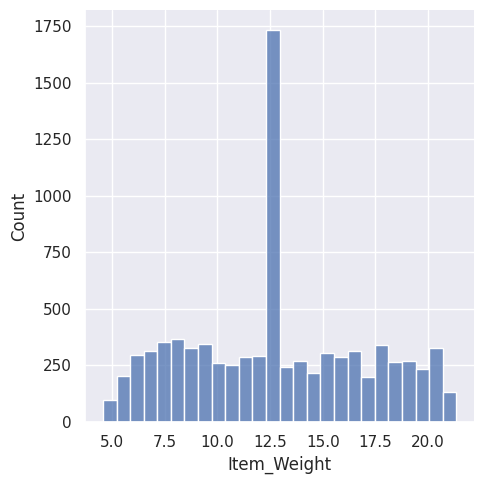

In [37]:
#Item_weight distribution
plt.figure(figsize = (6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

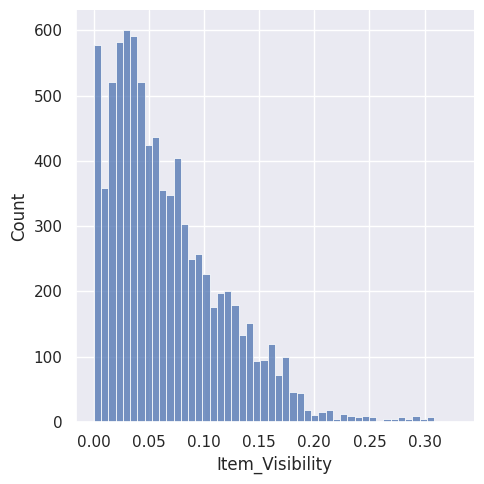

In [38]:
#Item_Visibility distribution
plt.figure(figsize = (6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

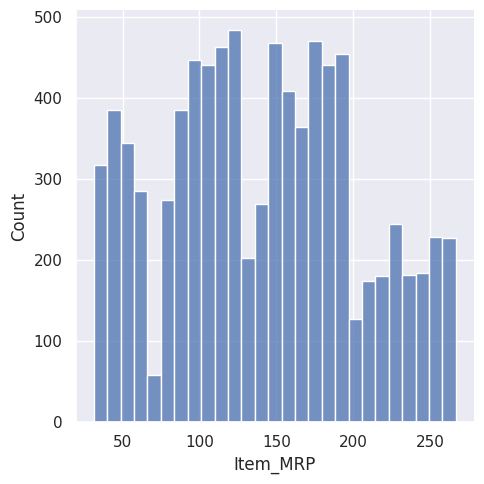

In [39]:
#Item_MRP distribution
plt.figure(figsize = (6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

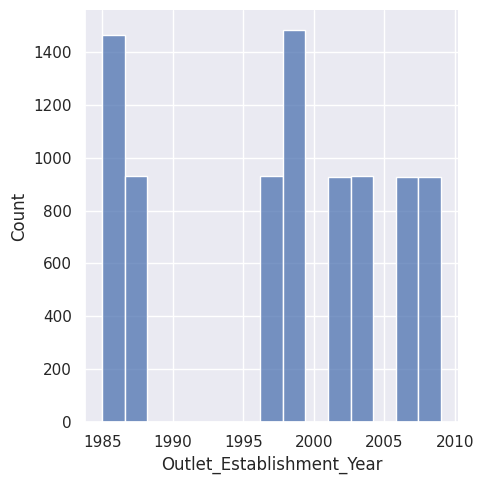

In [40]:
#Outlet_Establishment_Year distribution
plt.figure(figsize = (6,6))
sns.displot(big_mart_data['Outlet_Establishment_Year'])
plt.show()

<Figure size 600x600 with 0 Axes>

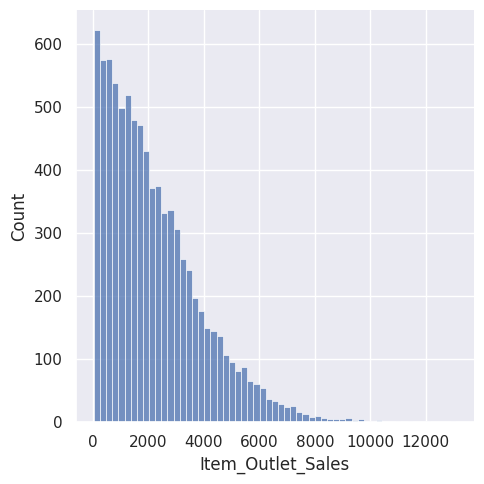

In [42]:
#Item_Outlet_Sales distribution
plt.figure(figsize = (6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

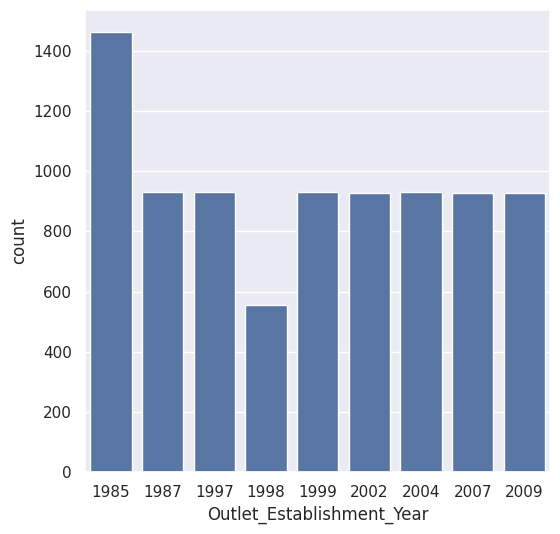

In [43]:
#Outlet_Establishment_Year column
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Establishment_Year', data =big_mart_data)
plt.show()

Categorical Features

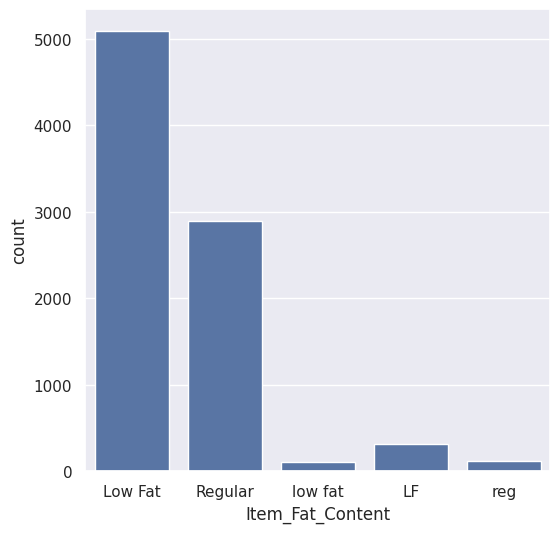

In [44]:
#Item_Fat_Content column
plt.figure(figsize = (6,6))
sns.countplot(x='Item_Fat_Content', data =big_mart_data)
plt.show()

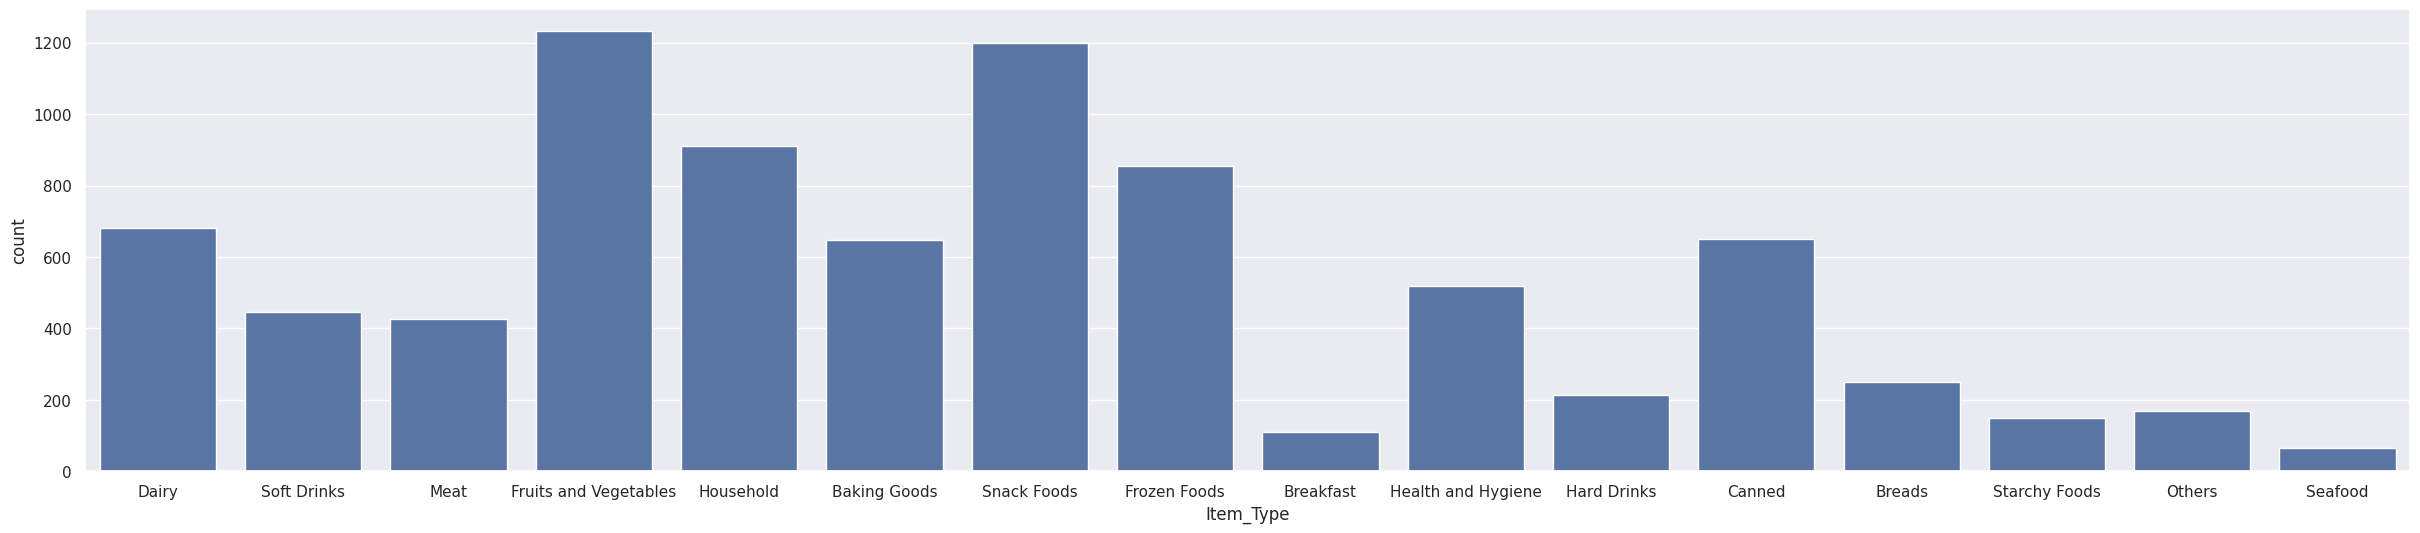

In [45]:
#Item_Type column
plt.figure(figsize = (30,6))
sns.countplot(x='Item_Type', data =big_mart_data)
plt.show()

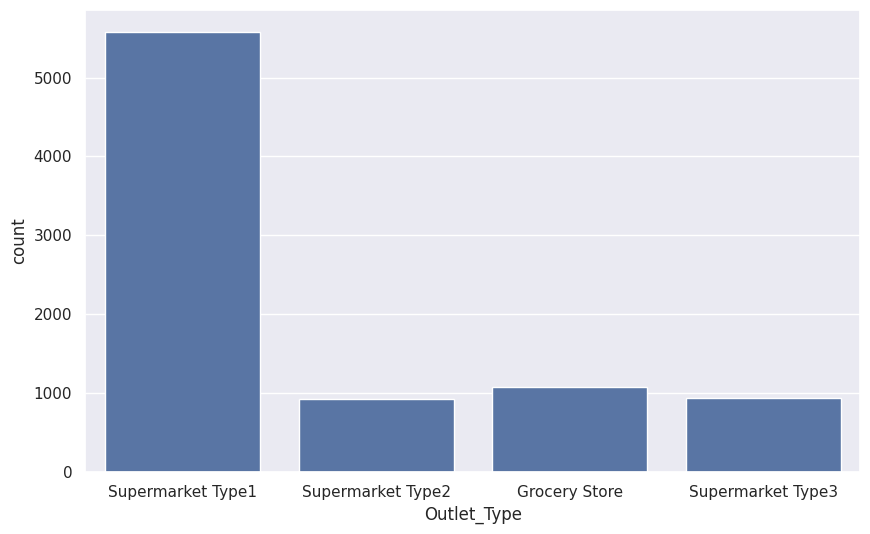

In [48]:
#Outlet_Type column
plt.figure(figsize = (10,6))
sns.countplot(x='Outlet_Type', data =big_mart_data)
plt.show()

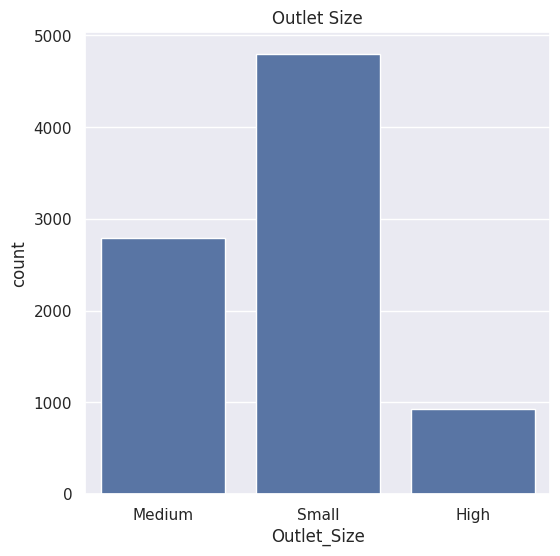

In [52]:
#Outlet_Size column
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Size', data =big_mart_data)
plt.title('Outlet Size')
plt.show()

In [54]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [56]:
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [57]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [58]:
encoder = LabelEncoder()

In [62]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [63]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and target

In [68]:
X = big_mart_data.drop('Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [69]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [70]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into training data and testing data

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training

In [73]:
regressor = XGBRegressor()

In [74]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [78]:
#R squared error
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [81]:
print("R squared error",r2_train)

R squared error 0.8762174618111388


In [83]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [85]:
#R squared error
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [86]:
print("R squared error",r2_test)

R squared error 0.5017253991620692
